
# O banco de dados foi criado com registros de absenteísmo no trabalho de julho de 2007 a julho de 2010 em uma empresa de courier no Brasil.
O conjunto de dados permite várias novas combinações de atributos e exclusões de atributos, ou a modificação do tipo de atributo (categórico, inteiro ou real) dependendo do propósito da pesquisa.

# **The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.**

# Importando as Bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dados_df = pd.read_csv('/content/dados.csv')

In [3]:
dados_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [4]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
dados_df.isna()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


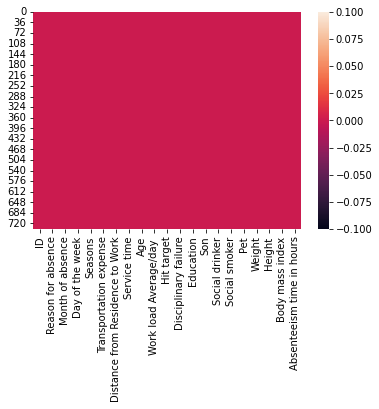

In [6]:
sns.heatmap(dados_df.isnull());

Nosso Objetivo é traçar o perfil dos funcionários que possuem tendência a faltar ao trabalho então vamos fazer uma codificação manual para nosso trabalho no atributo Absenteeism time in hours

In [7]:
dados_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


# **LIMPEZA DE DADOS, apagar alguns atributos que são dispensáveis em nosso projeto;**

=> Vamos manter caracteristicas subjetivas e qualificadoras da conduta e da personalidade e não dados objetivos;

O foco e descobrir o perfil de um funcionário faltante e quais suas caracteristicas;

In [1]:
dados_df = dados_df.drop(['ID','Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Pet', 'Weight','Height', 'Body mass index'], axis=1)   

NameError: ignored

In [9]:
dados_df['Absenteeism time in hours'] = dados_df['Absenteeism time in hours'].apply(lambda x: 1 if x > 0  else 0) 

In [10]:
dados_df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
0,289,36,13,33,239.554,0,1,2,1,0,1
1,118,13,18,50,239.554,1,1,1,1,0,0
2,179,51,18,38,239.554,0,1,0,1,0,1
3,279,5,14,39,239.554,0,1,2,1,1,1
4,289,36,13,33,239.554,0,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
735,289,36,13,33,264.604,0,1,2,1,0,1
736,235,11,14,37,264.604,0,3,1,0,0,1
737,118,14,13,40,271.219,0,1,1,1,0,0
738,231,35,14,39,271.219,0,1,2,1,0,0


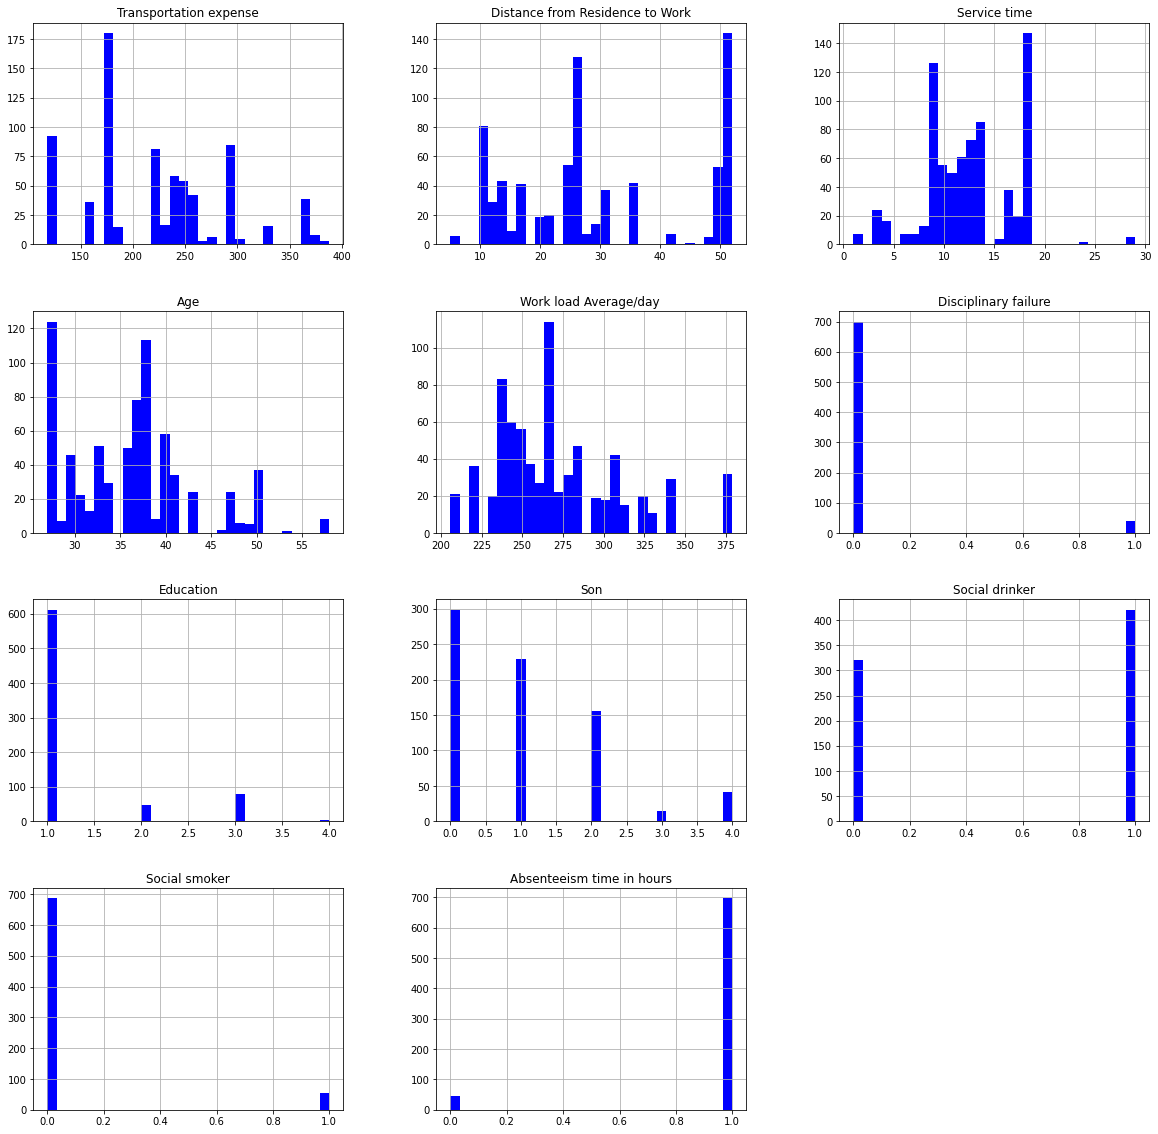

In [11]:
dados_df.hist(bins= 30, figsize=(20,20), color = 'b');

In [12]:
dados_df = dados_df.drop(['Social smoker'], axis=1)   

In [13]:
dados_df.shape

(740, 10)

# **Vamos Criar dois datas, um com pessoas que faltam e o outro com pessoas que não faltam.**

In [14]:
missed = dados_df[dados_df['Absenteeism time in hours'] == 1] 
no_missed = dados_df[dados_df['Absenteeism time in hours'] == 0]

In [15]:
print('Total de de funcionários: ', len(dados_df))
print('Número de funcionários que faltaram ao trabalho: ', len(missed))
print('Número de funcionários que não faltaram aoa trabalho: ', len(no_missed))
print('Porcentagem de funcionários que faltaram ao trabalho: ', (len(missed) / len(dados_df)) * 100)
print('Porcentagem de funcionários que não faltaram na empresa: ', (len(no_missed) / len(dados_df)) * 100)

Total de de funcionários:  740
Número de funcionários que faltaram ao trabalho:  696
Número de funcionários que não faltaram aoa trabalho:  44
Porcentagem de funcionários que faltaram ao trabalho:  94.05405405405406
Porcentagem de funcionários que não faltaram na empresa:  5.9459459459459465


Podemos obervar um número bem alto de funcionário que costumam faltar na empresa

In [16]:
missed.describe()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Absenteeism time in hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.000000,696.000000,696.0
mean,219.916667,29.853448,12.553161,36.254310,271.165718,0.0,1.303161,1.000000,0.561782,1.0
std,65.803295,14.855615,4.440175,6.380725,39.096003,0.0,0.685967,1.098069,0.496525,0.0
min,118.000000,5.000000,1.000000,27.000000,205.917000,0.0,1.000000,0.000000,0.000000,1.0
25%,179.000000,16.000000,9.000000,31.000000,243.659250,0.0,1.000000,0.000000,0.000000,1.0
50%,225.000000,26.000000,13.000000,37.000000,264.249000,0.0,1.000000,1.000000,1.000000,1.0
75%,260.000000,50.000000,16.000000,40.000000,294.217000,0.0,1.000000,2.000000,1.000000,1.0
max,388.000000,52.000000,29.000000,58.000000,378.884000,0.0,4.000000,4.000000,1.000000,1.0


In [17]:
no_missed.describe()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Absenteeism time in hours
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,243.681818,26.113636,12.568182,39.545455,276.623500,0.909091,1.113636,1.318182,0.659091,0.0
std,80.675570,14.239179,3.433066,7.273573,38.529052,0.290803,0.386752,1.073415,0.479495,0.0
min,118.000000,5.000000,4.000000,28.000000,237.656000,0.000000,1.000000,0.000000,0.000000,0.0
25%,213.500000,13.750000,11.000000,35.250000,244.387000,1.000000,1.000000,1.000000,0.000000,0.0
50%,235.000000,22.500000,13.000000,39.000000,268.519000,1.000000,1.000000,1.000000,1.000000,0.0
75%,289.500000,35.250000,14.000000,44.000000,284.236500,1.000000,1.000000,2.000000,1.000000,0.0
max,388.000000,51.000000,18.000000,53.000000,378.884000,1.000000,3.000000,4.000000,1.000000,0.0


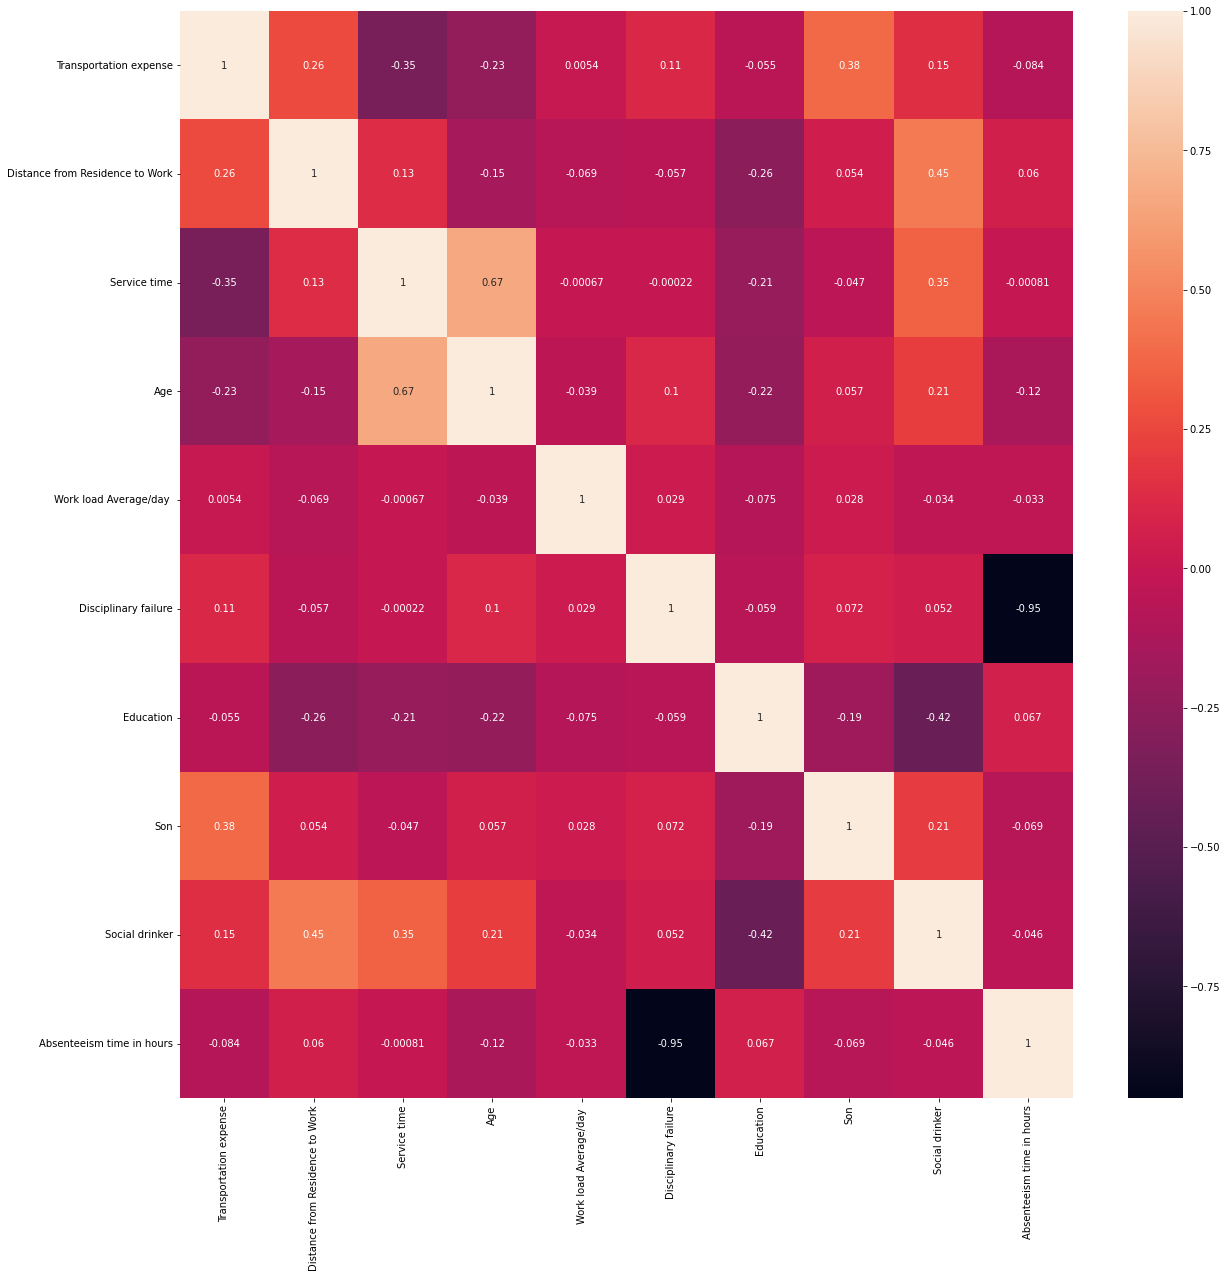

In [18]:
correlations = dados_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

Como os níveis de ausência de funcionários são altissímos vamos tentar identificar o perfil desses funcionários que nunca faltam e termos eles como os funcionários modelos para uma contratação e buscar neles o que podemos melhorar nos funcionários mais ausentes ao trabalho.

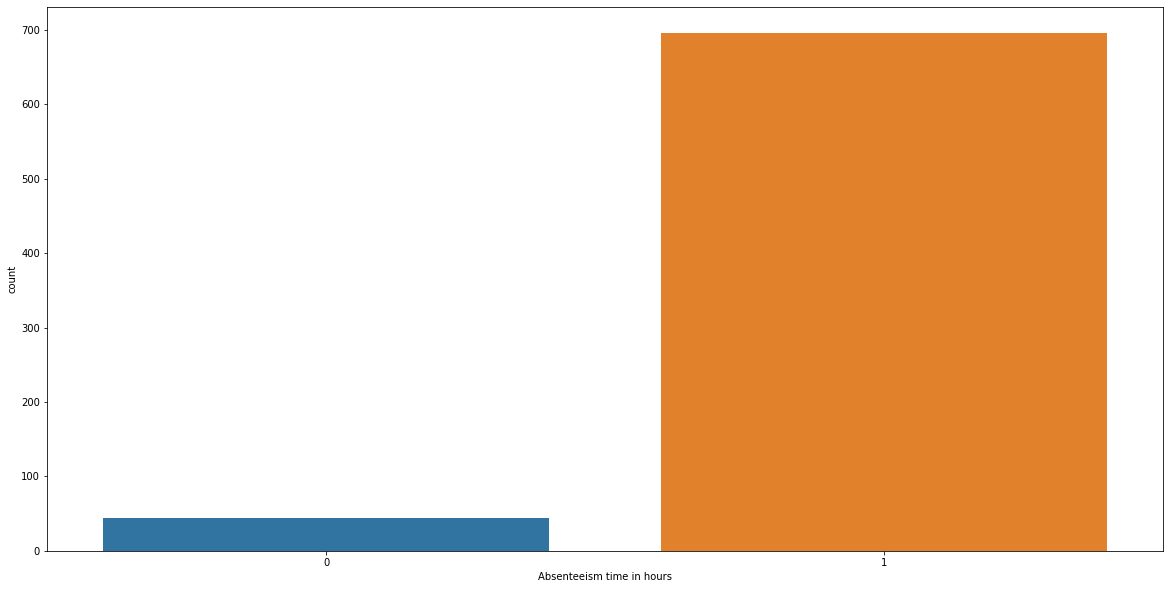

In [19]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'Absenteeism time in hours', data=dados_df);

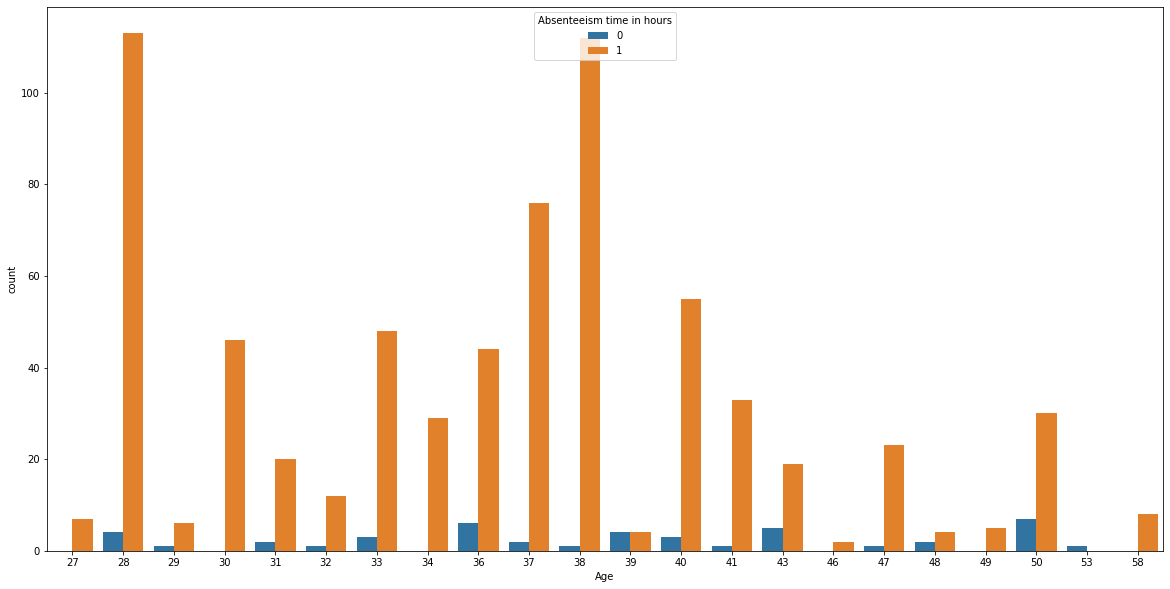

In [20]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'Age', hue= 'Absenteeism time in hours', data=dados_df);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


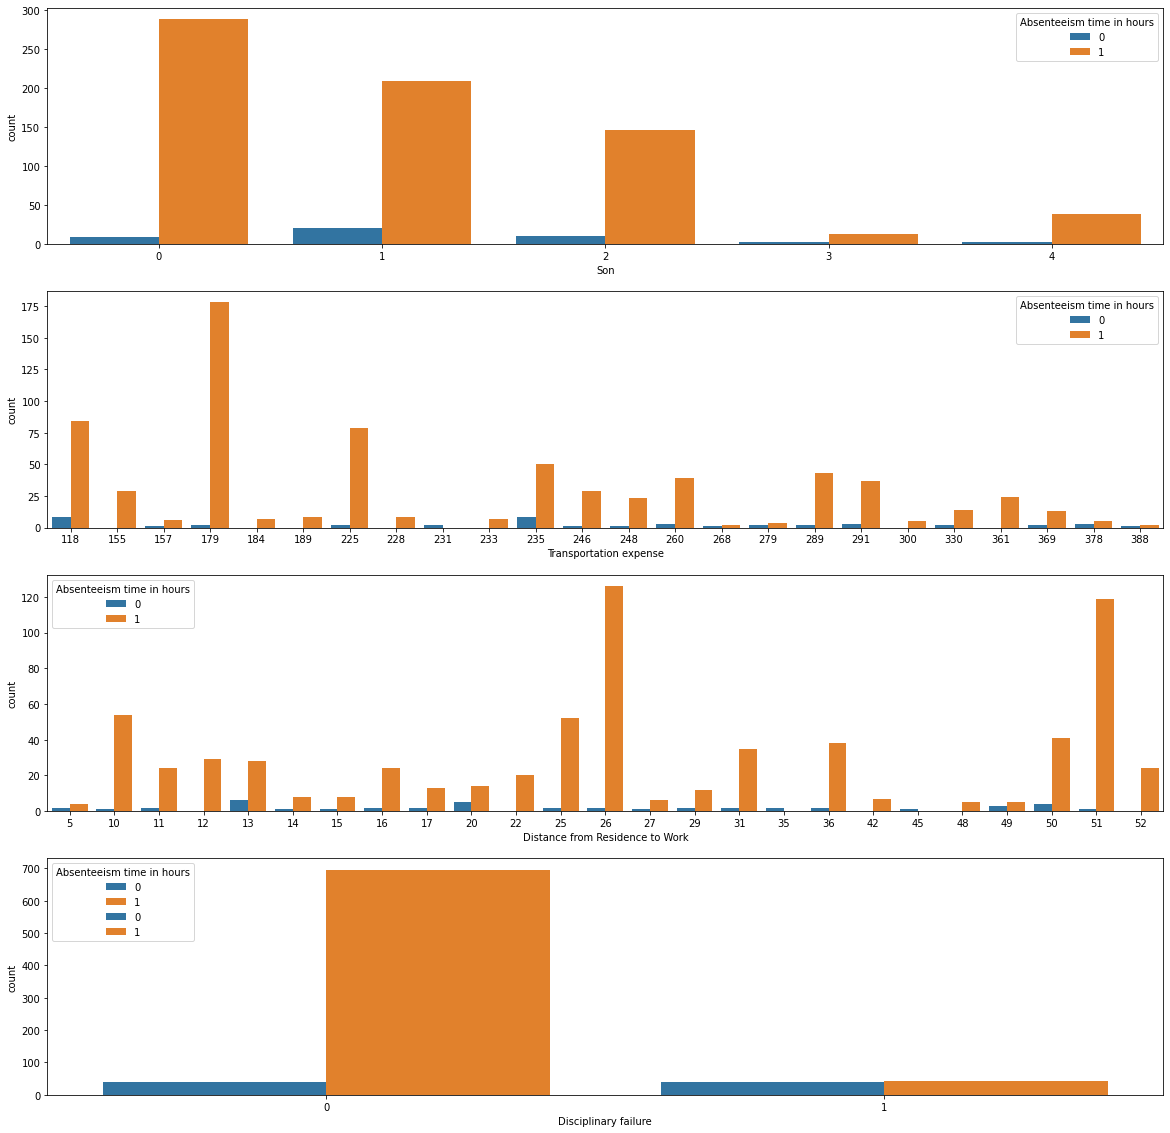

In [21]:
plt.figure(figsize=[20,20])
plt.subplot(411)  
sns.countplot(x = 'Son', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(412)  
sns.countplot(x = 'Transportation expense', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(413)  
sns.countplot(x = 'Distance from Residence to Work', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(414)  
sns.countplot(x = 'Education', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(414)  
sns.countplot(x = 'Disciplinary failure', hue = 'Absenteeism time in hours', data = dados_df)

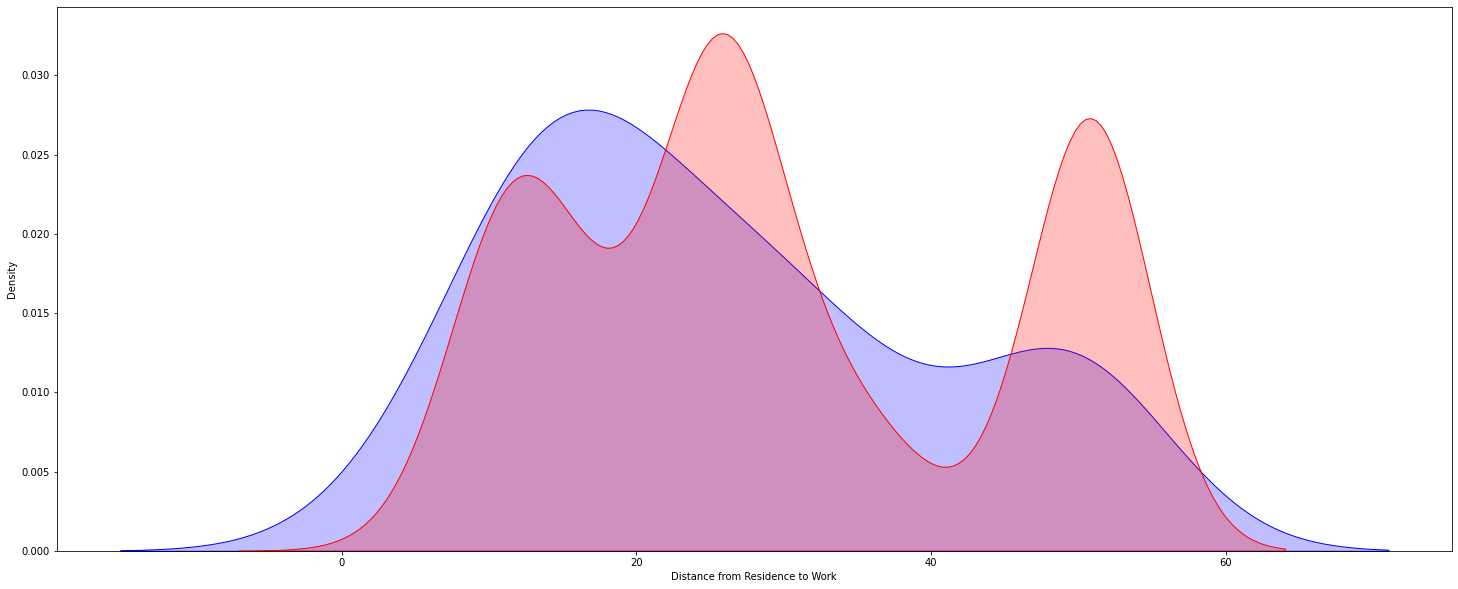

In [22]:
plt.figure(figsize=[25,10])
sns.kdeplot(no_missed['Distance from Residence to Work'], label = 'Funcionários que não faltam', shade = True, color = 'b')
sns.kdeplot(missed['Distance from Residence to Work'], label = 'Funcionários que faltam', shade = True, color = 'r');

# **Vamos fazer uma anáslise detalhada do perfil das pessoas que faltam e as que não faltaram na empresa**

In [23]:
dados_analise = pd.read_csv('/content/dados2.csv')      #     => clonamos o arquivo de dados para fazer uma analise mais profunda e detalhada e não haver nenhum erro no arquivo principal da caso de estudo;

In [24]:
dados_analise = dados_analise.drop(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Pet', 'Weight', 'Height', 'Body mass index'], axis = 1) 

In [25]:
dados_analise

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
0,11,289,36,13,33,239.554,0,1,2,1,0,4
1,36,118,13,18,50,239.554,1,1,1,1,0,0
2,3,179,51,18,38,239.554,0,1,0,1,0,2
3,7,279,5,14,39,239.554,0,1,2,1,1,4
4,11,289,36,13,33,239.554,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,0,1,2,1,0,8
736,1,235,11,14,37,264.604,0,3,1,0,0,4
737,4,118,14,13,40,271.219,0,1,1,1,0,0
738,8,231,35,14,39,271.219,0,1,2,1,0,0


In [26]:
eight_hours =  dados_analise.loc[dados_analise['Absenteeism time in hours'] == 8]      #  => Pessoas que se ausentaram pelo período de 8 horas, que seria o equivalente a 1 dias de trabalho;

In [27]:
eight_hours   ## 208/740*100 = 28% Se ausentaram do trabalho o equivalente a 8 horas de trabalho que seria relativo a um dia inteiro;

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
6,10,361,52,3,28,239.554,0,1,1,1,0,8
9,1,235,11,14,37,239.554,0,3,1,0,0,8
10,20,260,50,11,36,239.554,0,1,4,1,0,8
11,20,260,50,11,36,239.554,0,1,4,1,0,8
12,20,260,50,11,36,239.554,0,1,4,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
721,12,233,51,1,31,275.089,0,2,1,1,0,8
727,9,228,14,16,58,264.604,0,1,2,0,0,8
732,10,361,52,3,28,264.604,0,1,1,1,0,8
733,28,225,26,9,28,264.604,0,1,1,0,0,8


In [28]:
sixteen_hours = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 16]  # 2,5% Se ausentaram do trabalho o equivalente a 16 horas de trabalho que seria relativo a dois dias inteiros;

In [29]:
sixteen_hours.info

<bound method DataFrame.info of      ID  Transportation expense  ...  Social smoker  Absenteeism time in hours
74   20                     260  ...              0                         16
165  14                     155  ...              0                         16
166  20                     260  ...              0                         16
178  28                     225  ...              0                         16
180   7                     279  ...              1                         16
201  11                     289  ...              0                         16
229   1                     235  ...              0                         16
236  14                     155  ...              0                         16
274  24                     246  ...              0                         16
301  11                     289  ...              0                         16
308  22                     179  ...              0                         16
384  30             

In [30]:
twenty_four = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 24] 

In [31]:
twenty_four.info

<bound method DataFrame.info of      ID  Transportation expense  ...  Social smoker  Absenteeism time in hours
96   11                     289  ...              0                         24
173   3                     179  ...              0                         24
187  24                     246  ...              0                         24
191   3                     179  ...              0                         24
199  14                     155  ...              0                         24
212  11                     289  ...              0                         24
218  36                     118  ...              0                         24
222  24                     246  ...              0                         24
272  11                     289  ...              0                         24
387  24                     246  ...              0                         24
448   3                     179  ...              0                         24
534  18             

In [32]:
# 2,16% Se ausentaram do trabalho o equivalente a 24 horas de trabalho que seria relativo a três dias inteiros;

In [33]:
thirty_two = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 32]     # 0,81 Se ausentaram do trabalho o equivalente a 32 horas de trabalho que seria relativo a quatro dias inteiros;   

In [34]:
eight_less = dados_analise.loc[dados_analise['Absenteeism time in hours'] < 8] 

In [35]:
eight_less.info   # 63% Se ausentaram do trabalho o equivalente a menos de 8 horas;   

<bound method DataFrame.info of      ID  Transportation expense  ...  Social smoker  Absenteeism time in hours
0    11                     289  ...              0                          4
1    36                     118  ...              0                          0
2     3                     179  ...              0                          2
3     7                     279  ...              1                          4
4    11                     289  ...              0                          2
..   ..                     ...  ...            ...                        ...
731  34                     118  ...              0                          2
736   1                     235  ...              0                          4
737   4                     118  ...              0                          0
738   8                     231  ...              0                          0
739  35                     179  ...              0                          0

[469 rows x 12 colu

In [36]:
zero = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 0] 

In [37]:
zero.info   # 5,94% Não se ausentaram do trabalho em nenhum momento na base de dados;   => um dado interessante quase todos tiveram alguma falta diciplinar 

<bound method DataFrame.info of      ID  Transportation expense  ...  Social smoker  Absenteeism time in hours
1    36                     118  ...              0                          0
50   20                     260  ...              0                          0
51   29                     225  ...              0                          0
54   11                     289  ...              0                          0
55   36                     118  ...              0                          0
58   13                     369  ...              0                          0
64   36                     118  ...              0                          0
134  34                     118  ...              0                          0
203   2                     235  ...              1                          0
213   7                     279  ...              1                          0
214  18                     330  ...              0                          0
215  23             

In [38]:
zero.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,18.409091,243.681818,26.113636,12.568182,39.545455,276.623500,0.909091,1.113636,1.318182,0.659091,0.181818,0.0
std,11.860268,80.675570,14.239179,3.433066,7.273573,38.529052,0.290803,0.386752,1.073415,0.479495,0.390154,0.0
min,1.000000,118.000000,5.000000,4.000000,28.000000,237.656000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,7.000000,213.500000,13.750000,11.000000,35.250000,244.387000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,18.500000,235.000000,22.500000,13.000000,39.000000,268.519000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
75%,29.250000,289.500000,35.250000,14.000000,44.000000,284.236500,1.000000,1.000000,2.000000,1.000000,0.000000,0.0
max,36.000000,388.000000,51.000000,18.000000,53.000000,378.884000,1.000000,3.000000,4.000000,1.000000,1.000000,0.0


In [39]:
eight_hours.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0,208.000000,208.000000,208.000000,208.000000,208.0
mean,15.687500,247.759615,29.918269,11.961538,36.057692,272.637149,0.0,1.298077,1.240385,0.596154,0.100962,8.0
std,9.834055,73.096389,14.839172,4.672715,6.269051,41.128407,0.0,0.657617,1.124992,0.491851,0.302005,0.0
min,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,0.0,1.000000,0.000000,0.000000,0.000000,8.0
25%,9.750000,179.000000,16.000000,10.000000,31.000000,243.659250,0.0,1.000000,0.000000,0.000000,0.000000,8.0
50%,13.500000,235.000000,26.000000,13.000000,36.000000,265.017000,0.0,1.000000,1.000000,1.000000,0.000000,8.0
75%,23.250000,289.000000,49.000000,14.000000,40.000000,294.217000,0.0,1.000000,2.000000,1.000000,0.000000,8.0
max,36.000000,388.000000,52.000000,29.000000,58.000000,378.884000,0.0,4.000000,4.000000,1.000000,1.000000,8.0


In [40]:
twenty_four.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
count,16.000000,16.00000,16.00000,16.00000,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.0,16.0
mean,16.687500,222.87500,27.81250,14.37500,37.062500,305.618000,0.0,1.187500,0.937500,0.875000,0.0,24.0
std,10.403325,75.92178,14.22776,3.84491,6.433959,49.781297,0.0,0.543906,1.062623,0.341565,0.0,0.0
min,3.000000,118.00000,12.00000,4.00000,28.000000,222.196000,0.0,1.000000,0.000000,0.000000,0.0,24.0
25%,11.000000,173.00000,15.25000,13.00000,33.000000,264.878500,0.0,1.000000,0.000000,1.000000,0.0,24.0
50%,14.000000,212.50000,25.00000,15.00000,36.000000,309.938500,0.0,1.000000,0.500000,1.000000,0.0,24.0
75%,24.000000,289.00000,36.00000,18.00000,41.000000,330.652250,0.0,1.000000,2.000000,1.000000,0.0,24.0
max,36.000000,369.00000,51.00000,18.00000,50.000000,378.884000,0.0,3.000000,3.000000,1.000000,0.0,24.0


In [41]:
# Um dado interessante é que quase todas as pessoas que não possuem faltas teve 1 falta diciplinar;

Pré Processamento dos Dados

Podemos obervar que no dataframe não possui strings, ou seja não será necessário a transformação para atributos numéricos;

Vmos utilizar as dami variables

In [42]:
# vamos separar o nosso data para que um atributo númerico não seja maior ou melhor que o outro:

X_cat = dados_df[['Transportation expense',	'Distance from Residence to Work',	'Age',	'Disciplinary failure',	'Education',	'Son',	'Social drinker']]

In [43]:
X_cat

,Transportation expense,Distance from Residence to Work,Age,Disciplinary failure,Education,Son,Social drinker
0,289,36,33,0,1,2,1
1,118,13,50,1,1,1,1
2,179,51,38,0,1,0,1
3,279,5,39,0,1,2,1
4,289,36,33,0,1,2,1
...,...,...,...,...,...,...,...
735,289,36,33,0,1,2,1
736,235,11,37,0,3,1,0
737,118,14,40,0,1,1,1
738,231,35,39,0,1,2,1


In [44]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder() 

In [45]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [46]:
X_cat.shape   

(740, 84)

In [47]:
type(X_cat)

numpy.ndarray

In [48]:
X_cat = pd.DataFrame(X_cat)

In [49]:
type(X_cat)

pandas.core.frame.DataFrame

In [50]:
X = X_cat

In [51]:
#  SE DER PAU A PARTIR DAQUI EU FAÇO A NORMALIZAÇÃO DOS DADOS

In [52]:
y = dados_df['Absenteeism time in hours']
y

0      1
1      0
2      1
3      1
4      1
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
X_train.shape, y_train

((555, 84), 565    1
 72     1
 136    1
 149    1
 396    1
       ..
 423    1
 526    1
 665    1
 506    1
 39     1
 Name: Absenteeism time in hours, Length: 555, dtype: int64)

In [56]:
X_test.shape, y_test

((185, 84), 199    1
 732    1
 555    1
 413    1
 337    0
       ..
 579    1
 252    1
 635    1
 270    1
 566    1
 Name: Absenteeism time in hours, Length: 185, dtype: int64)

# **Regressão Logística**

Neste caso queremos saber se a pessoa tem ou não o perfil de ser uma pessoal faltante ao trabalho utilizaremos para prever se a pessoa pode faltar sim ou não, utilizando-se uma saída binária, sim ou não;

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logistic.predict(X_test)   
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
y_test 

199    1
732    1
555    1
413    1
337    0
      ..
579    1
252    1
635    1
270    1
566    1
Name: Absenteeism time in hours, Length: 185, dtype: int64

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred) # => é um ótimo valor para duas classes;

0.9945945945945946

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 10,   1],
       [  0, 174]])

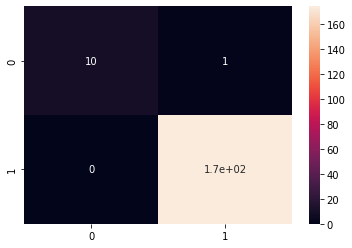

In [65]:
sns.heatmap(cm, annot=True);

# **Sklearn**

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [67]:
precision_score(y_test, y_pred) 

0.9942857142857143

In [68]:
recall_score(y_test, y_pred) 

1.0

In [69]:
f1_score(y_test, y_pred, average='macro')    

0.9747578114340292

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.99      1.00      1.00       174

    accuracy                           0.99       185
   macro avg       1.00      0.95      0.97       185
weighted avg       0.99      0.99      0.99       185



# **Random forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier  

In [72]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred = forest.predict(X_test)

In [74]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
accuracy_score(y_test, y_pred)

0.9945945945945946

In [76]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 10,   0],
       [  1, 174]])

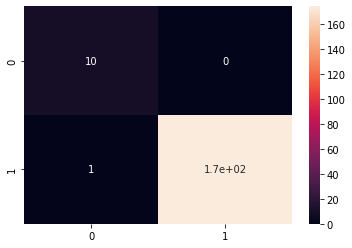

In [77]:
sns.heatmap(cm, annot=True);

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.99      1.00      1.00       174

    accuracy                           0.99       185
   macro avg       1.00      0.95      0.97       185
weighted avg       0.99      0.99      0.99       185



# Redes Neurais

In [79]:
import tensorflow as tf

In [80]:
X_train.shape

(555, 84)

In [81]:
rede_neural = tf.keras.models.Sequential()  

rede_neural.add(tf.keras.layers.Dense(units = 42, activation='relu', input_shape=(84,))) # 102 pois temos 102 colunas atributos;
rede_neural.add(tf.keras.layers.Dense(units = 42, activation = 'relu')) 
rede_neural.add(tf.keras.layers.Dense(units = 42, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  #   => temos uma saida, pois será o valor a ser retornado é entre 0 e 1;


In [82]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                3570      
_________________________________________________________________
dense_1 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 43        
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [83]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy']) 

In [84]:
rede_neural.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.9405
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9405
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9405
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9405
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9405
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9514
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9748
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9892
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9946
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9964
Epoch 11/

In [85]:
y_pred = rede_neural.predict(X_test)

In [86]:
y_pred

array([[9.9999899e-01],
       [9.9999869e-01],
       [9.9999440e-01],
       [9.9999505e-01],
       [2.9879808e-04],
       [9.9999511e-01],
       [9.9994767e-01],
       [9.9997395e-01],
       [9.9999589e-01],
       [2.4527315e-06],
       [9.9997497e-01],
       [9.9999154e-01],
       [9.9998426e-01],
       [9.9999511e-01],
       [9.9999440e-01],
       [9.9999809e-01],
       [9.9999142e-01],
       [9.9999505e-01],
       [9.9999928e-01],
       [9.7699070e-01],
       [9.7699070e-01],
       [9.9999666e-01],
       [9.7699070e-01],
       [9.9999511e-01],
       [2.9879808e-04],
       [9.9999511e-01],
       [9.7699070e-01],
       [9.9999440e-01],
       [9.9999440e-01],
       [9.9998683e-01],
       [9.9999809e-01],
       [9.9999154e-01],
       [9.9999511e-01],
       [9.9998683e-01],
       [9.9998760e-01],
       [9.9999899e-01],
       [9.9999505e-01],
       [9.9998683e-01],
       [9.9999440e-01],
       [9.9999899e-01],
       [9.9998760e-01],
       [9.999854

In [87]:
y_pred = (y_pred >= 0.5)  

In [88]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

In [89]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[ 10,   1],
       [  0, 174]])

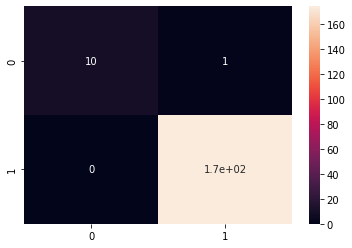

In [90]:
sns.heatmap(cm, annot=True);

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.99      1.00      1.00       174

    accuracy                           0.99       185
   macro avg       1.00      0.95      0.97       185
weighted avg       0.99      0.99      0.99       185



In [92]:
# A regressão logistica foi a que melhor apresentou resultado;

# **Salvando o Classificador**

In [93]:
import pickle

In [94]:
with open('variaveis_modelo.pkl', 'wb') as f:  
  pickle.dump([onehotencoder, logistic], f) 


In [95]:
with open('variaveis_modelo.pkl', 'rb') as f:
   encoder, model = pickle.load(f)

In [96]:
encoder, model  

(OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [97]:
X_novo = dados_df.iloc[0:1]      # seria o nosso novo funcionário na empresa;
X_novo


,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Absenteeism time in hours
0,289,36,13,33,239.554,0,1,2,1,1


In [98]:
X_cat_novo = X_novo[['Transportation expense',	'Distance from Residence to Work',	'Age',	'Disciplinary failure',	'Education',	'Son',	'Social drinker']]  
X_cat_novo

,Transportation expense,Distance from Residence to Work,Age,Disciplinary failure,Education,Son,Social drinker
0,289,36,33,0,1,2,1


In [99]:
X_cat_novo = encoder.transform(X_cat_novo).toarray() 

In [100]:
X_cat_novo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1.]])

In [101]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [102]:
model.predict(X_cat_novo)  # Um funcionário com essas caracteristicas tem chances de se ausentar no período de trabalho;

array([1])

In [103]:
model.predict_proba(X_cat_novo)   # A probabilidade da ausência é 98%;

array([[0.0073176, 0.9926824]])

In [104]:
model.classes_

array([0, 1])